# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [9]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [10]:
# OpenWeatherMap API Key
api_key = weather_api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

# Create empty lists
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
index = 0

print(f"Beginning Data Retrieval")
print(f"-------------------------------")

# Loop for City in Cities 
for city in cities:  
    
    # Try statement to append lists.
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {index} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        index = index + 1
                
    # If no record found "skip" to next call
    except:
        print("City not found. Moving on...")
    continue

14b0dce29c5f2&q=ust-kulom
City not found. Moving on...
Processing Record 428 | Fukuechō
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=657a4913680d929b2f614b0dce29c5f2&q=fukue
Processing Record 429 | Trat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=657a4913680d929b2f614b0dce29c5f2&q=trat
Processing Record 430 | Marovoay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=657a4913680d929b2f614b0dce29c5f2&q=marovoay
Processing Record 431 | Garden City
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=657a4913680d929b2f614b0dce29c5f2&q=garden city
Processing Record 432 | Bārdoli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=657a4913680d929b2f614b0dce29c5f2&q=bardoli
Processing Record 433 | Namatanai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=657a4913680d929b2f614b0dce29c5f2&q=namatanai
Processing Record 434 | Hailey
http://api.openweathermap.org/data/2.5/weather?un

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:

# Create a dictonary from lists generated
weatherpy_df = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a DataFrame from dictionary
weatherData_df = pd.DataFrame(weatherpy_df)

# Display count of weather data values 
weatherData_df.count()

City          563
Cloudiness    563
Country       563
Date          563
Humidity      563
Lat           563
Lng           563
Max Temp      563
Wind Speed    563
dtype: int64

In [12]:
# Save DataFrame to CSV
weatherData_df.to_csv('../output_data/weather_data.csv')

# Display DataFrame 
weatherData_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Vaini,20,TO,1624722022,73,-21.2000,-175.2000,71.76,12.66
1,Mongo,10,TD,1624722023,18,12.1844,18.6930,102.34,3.13
2,Kloulklubed,100,PW,1624721774,73,7.0419,134.2556,75.70,7.20
3,Nanortalik,72,GL,1624722024,88,60.1432,-45.2371,47.64,4.54
4,Pontianak,20,ID,1624722024,83,-0.0333,109.3333,80.58,0.00


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [14]:
weatherData_df.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,563.000000,5.630000e+02,563.000000,563.000000,563.000000,563.000000,563.000000
mean,58.211368,1.624722e+09,68.738899,19.843298,18.618563,71.469609,7.911563
std,36.777388,8.222584e+01,21.155441,32.508969,89.774203,14.959262,5.558577
min,0.000000,1.624722e+09,5.000000,-54.800000,-175.200000,31.910000,0.000000
25%,20.000000,1.624722e+09,58.000000,-5.512450,-58.125100,60.945000,3.600000
50%,73.000000,1.624722e+09,72.000000,21.426700,21.516700,74.050000,6.710000
75%,91.500000,1.624722e+09,83.500000,46.574850,101.233300,82.065000,10.680000
max,100.000000,1.624722e+09,100.000000,78.218600,179.316700,115.660000,32.730000


In [15]:
#  Get the indices of cities that have humidity over 100%.
weatherData_df.count()

City          563
Cloudiness    563
Country       563
Date          563
Humidity      563
Lat           563
Lng           563
Max Temp      563
Wind Speed    563
dtype: int64

In [22]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
maxHumidity = weatherData_df['Humidity'].max()

# If Humidity Greater than 100%, Create DataFrame with Humidity <=100%
if maxHumidity > 100:
    cleanWeather_df = weatherData_df.loc[weatherData_df['Humidity']<=100]
    clean_df = pd.DataFrame(cleanWeather_df)
    print(clean_df)
else:
    print('No Humidity Over 100%')

No Humidity Over 100%


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

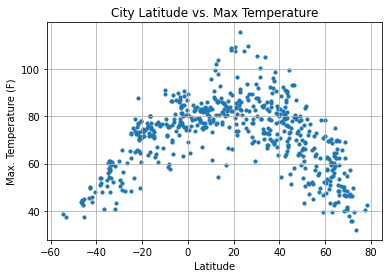

<Figure size 432x288 with 0 Axes>

In [24]:
# Build a scatter plot for each data type
plt.scatter(weatherData_df["Lat"], weatherData_df["Max Temp"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()
# Saving Figure as PNG
plt.savefig('../output_data/Fig1.png')

## Latitude vs. Humidity Plot

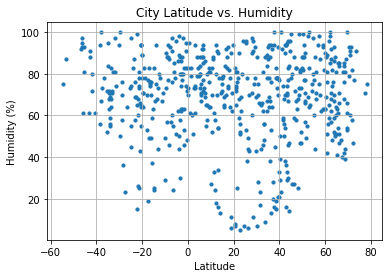

<Figure size 432x288 with 0 Axes>

In [25]:
# Build a scatter plot for each data type
plt.scatter(weatherData_df["Lat"], weatherData_df["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()
# Saving Figure as PNG
plt.savefig('../output_data/Fig2.png')

## Latitude vs. Cloudiness Plot

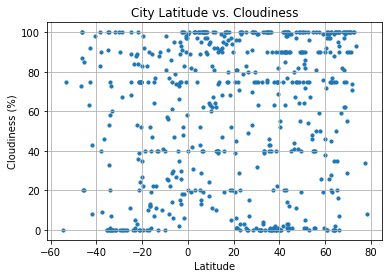

<Figure size 432x288 with 0 Axes>

In [26]:
# Build a scatter plot for each data type
plt.scatter(weatherData_df["Lat"], weatherData_df["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()
# Saving Figure as PNG
plt.savefig('../output_data/Fig3.png')

## Latitude vs. Wind Speed Plot

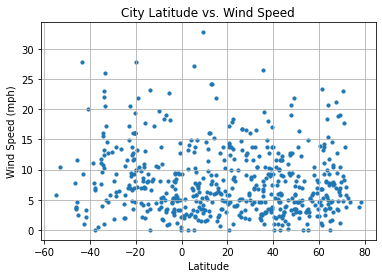

<Figure size 432x288 with 0 Axes>

In [27]:
# Build a scatter plot for each data type
plt.scatter(weatherData_df["Lat"], weatherData_df["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)


# Show plot
plt.show()
# Saving Figure as PNG
plt.savefig('../output_data/Fig4.png')

## Linear Regression

In [38]:
# Linear Regress by Hemisphere
# Create DataFrame by Hemisphere
northHemi_df = weatherData_df.loc[(weatherData_df['Lat']>0)]
southHemi_df = weatherData_df.loc[(weatherData_df['Lat'] < 0)]

In [41]:
def line_regr(x,y,yaxis):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    y_pred = intercept + slope*x
    line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x,y)
    plt.plot(x,y_pred,"r-")
    plt.xlabel('Latitude')
    plt.ylabel(yaxis)
    plt.annotate(line_eq,(6,40),fontsize=15,color="red")
    print(f"r-squared: {rvalue}")
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

r-squared: -0.6715100322704832


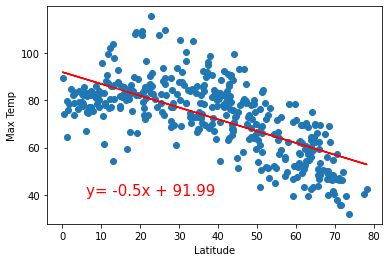

<Figure size 432x288 with 0 Axes>

In [51]:
#Northern Hemisphere - Temperature (F) vs. Latitude
x = northHemi_df['Lat']
y = northHemi_df['Max Temp']
line_regr(x,y,'Max Temp')

plt.savefig("../output_data/NHtemp_vs_lat.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

r-squared: 0.8366989854623598


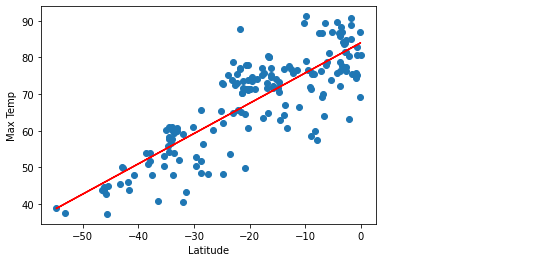

<Figure size 432x288 with 0 Axes>

In [52]:
# Southern Hemisphere - Temperature (F) vs. Latitude
x = southHemi_df['Lat']
y = southHemi_df['Max Temp']
line_regr(x,y,'Max Temp')

plt.savefig("../output_data/SHtemp_vs_lat.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-squared: 0.03877564492186298


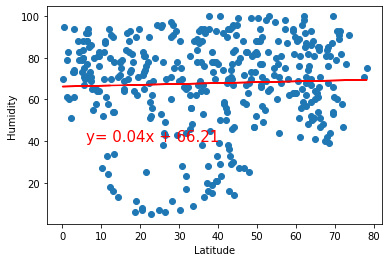

<Figure size 432x288 with 0 Axes>

In [53]:
# Northern Hemisphere - Humidity (%) vs. Latitude 
x = northHemi_df['Lat']
y = northHemi_df['Humidity']
line_regr(x,y,'Humidity')

plt.savefig("../output_data/NHhum_vs_lat.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-squared: -0.08996379577055785


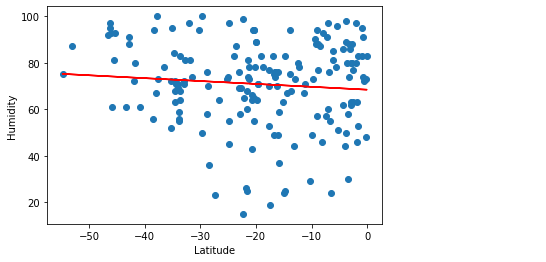

<Figure size 432x288 with 0 Axes>

In [54]:
# Southern Hemisphere - Humidity (%) vs. Latitude 
x = southHemi_df['Lat']
y = southHemi_df['Humidity']
line_regr(x,y,'Humidity')

plt.savefig("../output_data/SHhum_vs_lat.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-squared: 0.007190823394213635


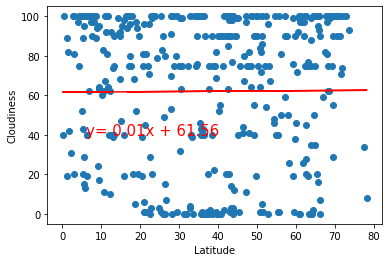

<Figure size 432x288 with 0 Axes>

In [55]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude 
x = northHemi_df['Lat']
y = northHemi_df['Cloudiness']
line_regr(x,y,'Cloudiness')

plt.savefig("../output_data/NHcloud_vs_lat.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-squared: 0.06224798046695738


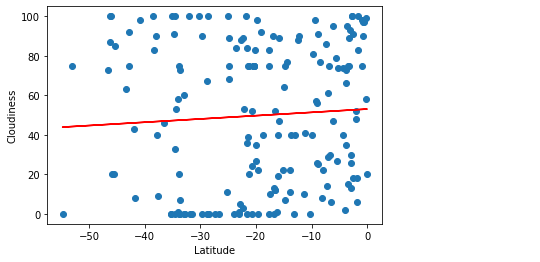

<Figure size 432x288 with 0 Axes>

In [56]:
 #Southern Hemisphere - Cloudiness (%) vs. Latitude
x = southHemi_df['Lat']
y = southHemi_df['Cloudiness']
line_regr(x,y,'Cloudiness')

plt.savefig("../output_data/SHcloud_vs_lat.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-squared: -0.023001563818959528


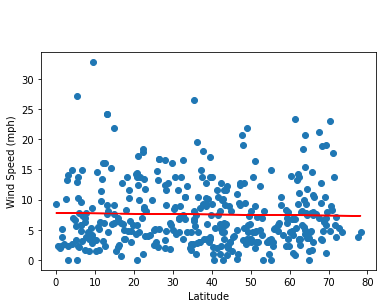

<Figure size 432x288 with 0 Axes>

In [57]:
#Northern Hemisphere - Wind Speed (mph) vs. Latitude
x = northHemi_df['Lat']
y = northHemi_df['Wind Speed']
line_regr(x,y,'Wind Speed (mph)')

plt.savefig("../output_data/NHwind_vs_lat.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-squared: -0.17036084059864795


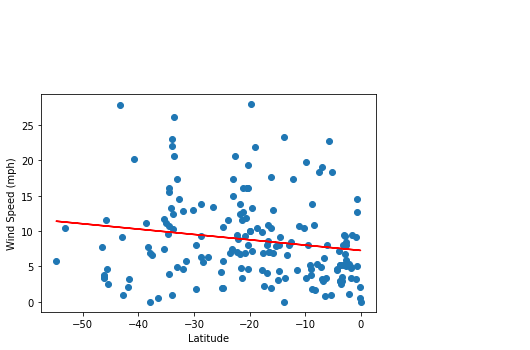

<Figure size 432x288 with 0 Axes>

In [58]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude
x = southHemi_df['Lat']
y = southHemi_df['Wind Speed']
line_regr(x,y,'Wind Speed (mph)')

plt.savefig("../output_data/SHwind_vs_lat.png")